In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# StandardScaler for normalization
from sklearn.preprocessing import StandardScaler

# SMOTE for balancing the data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [6]:
# Load dataset
df = sns.load_dataset("titanic")

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  

In [7]:
# EDA - Exploratory Data Analysis
# Check missing values:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [8]:
# Summary statistics - an overview of numerical and categorical data.
print(df.describe(include="all"))


          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

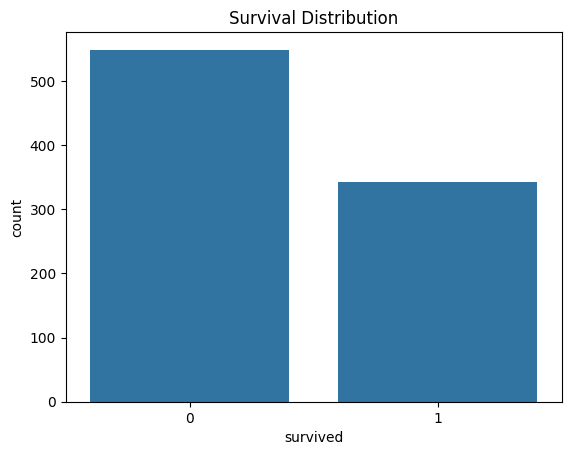

In [9]:
# class distribution - checking class imbalance 
sns.countplot(x=df["survived"])
plt.title("Survival Distribution")
plt.show()

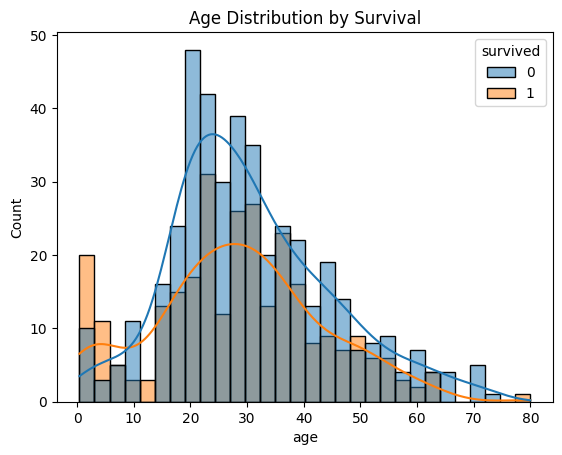

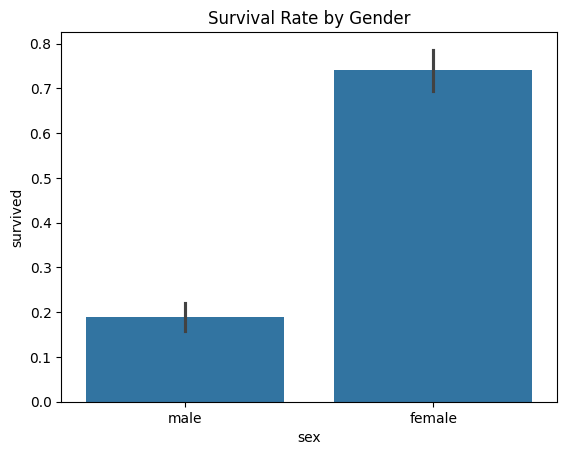

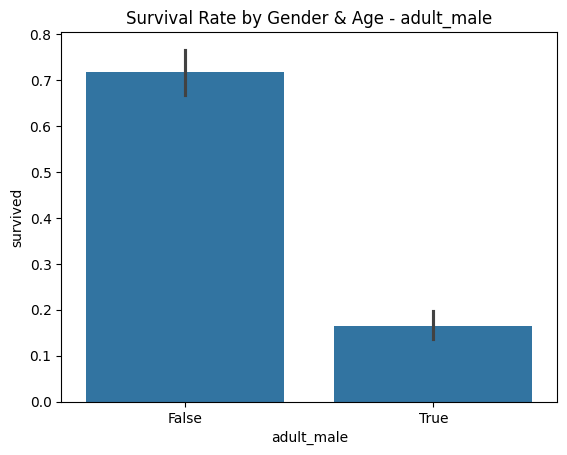

In [10]:
# Checking age vs. survival
sns.histplot(df, x="age", hue="survived", bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

# Checking gender vs. survival - Women generally had a higher survival rate.
sns.barplot(x="sex", y="survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Checking adult_male  vs. survival
sns.barplot(x="adult_male", y="survived", data=df)
plt.title("Survival Rate by Gender & Age - adult_male")
plt.show()



In [11]:
# Preprocessing:
# Handle Missing Values
# Fill missing age values with the median age (177 missing values)
df["age"] = df["age"].fillna(df["age"].median())

# Drop deck (too many missing values - 688 values... not too useful for us)
df.drop(columns=["deck"], inplace=True)

# Fill missing embarked with the most common value (only 2 values missing)
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode().iloc[0])


In [12]:
# Should We Remove sex or adult_male?
# If we one-hot encode sex, it will create two binary columns (male, female).
# The column adult_male is highly correlated with sex.
# You can remove adult_male to avoid redundancy, keeping just sex.
# However, if adult_male provides unique insights (e.g., children vs. adult males), keeping both might be useful.



In [13]:
# One-Hot Encoding embark_town & class
df = pd.get_dummies(df, columns=["embark_town", "class"], drop_first=True)

# drop_first=True removes one category from each to prevent multicollinearity.
# This keeps the number of features minimal while preserving information.

# In the Titanic dataset, "embarked" represents the port where a passenger boarded the ship. It has three possible values:

#C → Cherbourg
#Q → Queenstown
#S → Southampton
#This column is similar to "embark_town", but "embarked" uses single-letter codes, while "embark_town" has full names (Cherbourg, Queenstown, Southampton).

#Which One Should You Use?
#Use "embarked" if you want a shorter categorical feature (since it has only one letter per value).
#Use "embark_town" if you prefer full names (for readability).
#Don't use both—they contain the same information!

In [14]:
# print what it looks like now
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sex                      891 non-null    object 
 3   age                      891 non-null    float64
 4   sibsp                    891 non-null    int64  
 5   parch                    891 non-null    int64  
 6   fare                     891 non-null    float64
 7   embarked                 889 non-null    object 
 8   who                      891 non-null    object 
 9   adult_male               891 non-null    bool   
 10  alive                    891 non-null    object 
 11  alone                    891 non-null    bool   
 12  embark_town_Queenstown   891 non-null    bool   
 13  embark_town_Southampton  891 non-null    bool   
 14  class_Second             8

In [15]:
# Step 5: Normalize Numeric Features
# Neural networks and logistic regression work best when numeric values are on a similar scale.
# scaler = StandardScaler()
# df[["age", "fare"]] = scaler.fit_transform(df[["age", "fare"]])

# TODO?!?!?
# The issue with negative values in the age column after scaling likely arises from the way StandardScaler works. The StandardScaler standardizes features by removing the mean and scaling to unit variance. This transformation centers the data around 0, which can result in negative values, 
# especially if the original data had values below the mean.
# If you want to avoid negative values, you might want to use MinMaxScaler, which scales the data to a specified range 
# (default is between 0 and 1). This might be a better approach if you want to keep all values within a positive range.

# Didn't do here- later got an error and did it

In [16]:
# Drop unnecessary columns (not useful for prediction)
# Redundnat - alive -> survived embarked -> embarked_town
df.drop(columns=["alive", "embarked"], errors="ignore", inplace=True)

# The issue with negative values in the age column after scaling likely arises from the way StandardScaler works. The StandardScaler standardizes features by removing the mean and scaling to unit variance. This transformation centers the data around 0, which can result in negative values, 
# especially if the original data had values below the mean.
# If you want to avoid negative values, you might want to use MinMaxScaler, which scales the data to a specified range 
# (default is between 0 and 1). This might be a better approach if you want to keep all values within a positive range.



In [17]:
# Feature selection
# The dataset has sibsp (siblings/spouses aboard) and parch (parents/children aboard). Combining these can provide a new feature representing the total size of the passenger's family on board.

df['family_size'] = df['sibsp'] + df['parch']

In [18]:
df.drop(columns=['sibsp', 'parch'], inplace=True)


In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select relevant columns
encoded_df = df[["sex", "age", "who", "adult_male"]].copy()

# Convert categorical variables to numeric
encoded_df["sex"] = df["sex"].map({"male": 1, "female": 0})
encoded_df["who"] = df["who"].map({"man": 1, "woman": 0, "child": 2})
encoded_df["adult_male"] = df["adult_male"].astype(int)

# Drop NaN values (VIF can't handle NaNs)
encoded_df.dropna(inplace=True)

# Add constant for regression (needed for VIF calculation)
X = sm.add_constant(encoded_df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Show results
print(vif_data)


      Feature        VIF
0       const  11.774549
1         sex   9.818484
2         age   1.474525
3         who   2.560194
4  adult_male   7.607280


In [20]:
encoded_df.head()

,sex,age,who,adult_male
0,1,22.0,1,1
1,0,38.0,0,0
2,0,26.0,0,0
3,0,35.0,0,0
4,1,35.0,1,1


In [21]:
# There is a correlation of sex, age, who and adult_male
# RUN VIF on them

# After doing that - we've decided to go with adult_male from previous grpahs


In [22]:
correlation_data = encoded_df[['sex', 'age', 'who', 'adult_male']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                 sex       age       who  adult_male
sex         1.000000  0.081163  0.639773    0.908578
age         0.081163  1.000000 -0.350163    0.247704
who         0.639773 -0.350163  1.000000    0.437532
adult_male  0.908578  0.247704  0.437532    1.000000


In [23]:
df.drop(columns=['who'], inplace=True)

In [24]:
correlation_data = encoded_df[['sex', 'age', 'adult_male']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                 sex       age  adult_male
sex         1.000000  0.081163    0.908578
age         0.081163  1.000000    0.247704
adult_male  0.908578  0.247704    1.000000


In [25]:
df.drop(columns=['sex'], inplace=True)


In [26]:
df.head()

,survived,pclass,age,fare,adult_male,alone,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third,family_size
0,0,3,22.0,7.2500,True,False,False,True,False,True,1
1,1,1,38.0,71.2833,False,False,False,False,False,False,1
2,1,3,26.0,7.9250,False,True,False,True,False,True,0
3,1,1,35.0,53.1000,False,False,False,True,False,False,1
4,0,3,35.0,8.0500,True,True,False,True,False,True,0


In [27]:
# Define target and features
X = df.drop(columns=["survived"])
y = df["survived"]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Check for missing values (NaN) in each column
missing_values = df.isna().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

# validated - no NANs

Series([], dtype: int64)


In [29]:
# Run a Logistic regression on the data:

In [31]:
# Step 1: Create a Logistic Regression model
lr_model = LogisticRegression()

# Step 2: Use 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')  # You can change scoring if needed

# Step 3: Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

# Step 4: Fit the model on the entire training set and test on the test set
lr_model.fit(X_train, y_train)

# Step 5: Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_predictions))

Cross-validation scores: [0.83916084 0.83216783 0.82394366 0.77464789 0.84507042]
Mean cross-validation accuracy: 0.8229981286319313
Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



/Users/ifat.peleg/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ifat.peleg/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [ ]:
# Got a warning - we have to scale the data

In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with scaled data
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_predictions))

# These results inidicate the data is not balanced - rerunning with SMOTE! (question 10)

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [33]:
# Define target and features
# X = df.drop(columns=["survived"])
# y = df["survived"]

# # Apply SMOTE to balance classes 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the model with scaled data
lr_model.fit(X_resampled, y_resampled)

# Predict on the test set
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_predictions))

# After SMOTE - much better results! balance imbalanced datasets by generating synthetic samples of the minority class. 
# It helps prevent the model from being biased toward the majority class.
# This answers question 10


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [34]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input

# Use the same data for the NN
# If you already have X_train, X_test, y_train, y_test from the logistic regression step:
# Simply use them for the neural network

# Build and train the neural network as before - scaled but not SMOTE

nn_model = Sequential()

# Input layer 
nn_model.add(Input(shape=(X_train_scaled.shape[1],))) 

# Hidden layers
nn_model.add(Dense(64, activation='relu'))  
nn_model.add(Dense(32, activation='relu'))  

# Output layer
nn_model.add(Dense(1, activation='sigmoid'))  

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [36]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
nn_history = nn_model.fit(X_train_scaled, y_train, 
                           validation_split=0.1, 
                           epochs=50, 
                           batch_size=32, 
                           callbacks=[early_stopping])

# Train the model
# nn_history = nn_model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=32)

# Predict on the test set
y_pred = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model
print("Neural Network Performance:")
print(classification_report(y_test, y_pred))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8201 - loss: 0.3949 - val_accuracy: 0.9028 - val_loss: 0.2831
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8237 - loss: 0.4034 - val_accuracy: 0.9028 - val_loss: 0.2835
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8399 - loss: 0.3754 - val_accuracy: 0.9028 - val_loss: 0.2882
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8346 - loss: 0.3829 - val_accuracy: 0.9028 - val_loss: 0.2845
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8232 - loss: 0.4075 - val_accuracy: 0.9028 - val_loss: 0.2894
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8495 - loss: 0.3733 - val_accuracy: 0.8889 - val_loss: 0.2863
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Neural Network Performance:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy  

In [37]:
# Changing the Number of Neurons in the Hidden Layer
for neurons in [16, 32, 64]:
    print(f"Training with {neurons} neurons in each hidden layer")

    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(neurons, activation='relu'),  # Second hidden layer
        Dense(1, activation='sigmoid')  # Output layer
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=32, 
                           callbacks=[early_stopping])

    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    print(f"Performance for {neurons} neurons:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 50, "\n")

Training with 16 neurons in each hidden layer
Epoch 1/50


/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6216 - loss: 0.6562 - val_accuracy: 0.7778 - val_loss: 0.5903
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6866 - loss: 0.6188 - val_accuracy: 0.8056 - val_loss: 0.5338
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7267 - loss: 0.5812 - val_accuracy: 0.8889 - val_loss: 0.4815
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7800 - loss: 0.5501 - val_accuracy: 0.9167 - val_loss: 0.4390
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8128 - loss: 0.4978 - val_accuracy: 0.9028 - val_loss: 0.4045
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8182 - loss: 0.4712 - val_accuracy: 0.8889 - val_loss: 0.3774
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7908 - loss: 0.4863 - val_accuracy: 0.8889 - val_loss: 0.3618
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8366 - loss: 0.4255 - val_accuracy: 0.9028 - val_loss: 0.3410
Epo

/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5740 - loss: 0.6887 - val_accuracy: 0.8611 - val_loss: 0.5645
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7822 - loss: 0.5727 - val_accuracy: 0.8889 - val_loss: 0.4683
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.5050 - val_accuracy: 0.8889 - val_loss: 0.3967
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4695 - val_accuracy: 0.8889 - val_loss: 0.3534
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8158 - loss: 0.4267 - val_accuracy: 0.9028 - val_loss: 0.3270
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8094 - loss: 0.4350 - val_accuracy: 0.8889 - val_loss: 0.3111
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8146 - loss: 0.4043 - val_accuracy: 0.8889 - val_loss: 0.3043
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8151 - loss: 0.4130 - val_accuracy: 0.8889 - val_loss: 0.3010
Epo

/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7446 - loss: 0.6146 - val_accuracy: 0.9444 - val_loss: 0.4086
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8038 - loss: 0.4894 - val_accuracy: 0.9444 - val_loss: 0.3134
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8069 - loss: 0.4672 - val_accuracy: 0.9444 - val_loss: 0.2900
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.4205 - val_accuracy: 0.9167 - val_loss: 0.2785
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7898 - loss: 0.4520 - val_accuracy: 0.9028 - val_loss: 0.2808
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8589 - loss: 0.3717 - val_accuracy: 0.9028 - val_loss: 0.2729
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8440 - loss: 0.3794 - val_accuracy: 0.8889 - val_loss: 0.2873
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8344 - loss: 0.3952 - val_accuracy: 0.9028 - val_loss: 0.2831
Epo

In [38]:
print(f"Training with 8 neurons in each hidden layer")

neurons = 8

model = Sequential([
    Dense(neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(neurons, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=32, 
                           callbacks=[early_stopping])

y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

print(f"Performance for {neurons} neurons:\n")
print(classification_report(y_test, y_pred))
print("-" * 50, "\n")

Training with 8 neurons in each hidden layer


/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'Adam' is not defined

In [39]:
# Changing the Learning Rate (Keeping Two Hidden Layers)
from keras.optimizers import Adam

for lr in [0.01, 0.001, 0.0001]:
    print(f"Training with learning rate: {lr}")

    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=32, 
                           callbacks=[early_stopping])

    y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

    print(f"Performance for learning rate {lr}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 50, "\n")


Training with learning rate: 0.01
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7364 - loss: 0.5594 - val_accuracy: 0.8194 - val_loss: 0.3542
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8267 - loss: 0.4297 - val_accuracy: 0.8889 - val_loss: 0.2987
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8068 - loss: 0.4357 - val_accuracy: 0.8889 - val_loss: 0.3134
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7940 - loss: 0.4142 - val_accuracy: 0.8889 - val_loss: 0.3235
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8504 - loss: 0.3771 - val_accuracy: 0.8889 - val_loss: 0.3021
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8476 - loss: 0.3757 - val_accuracy: 0.8750 - val_loss: 0.3056
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8245 - loss: 0.3967 - val_accuracy: 0.9028 - val_loss: 0.2950
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8219 - loss: 0.3887 

/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5986 - loss: 0.6583 - val_accuracy: 0.8750 - val_loss: 0.5361
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7782 - loss: 0.5637 - val_accuracy: 0.8889 - val_loss: 0.4435
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7928 - loss: 0.5075 - val_accuracy: 0.8889 - val_loss: 0.3811
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8054 - loss: 0.4817 - val_accuracy: 0.8750 - val_loss: 0.3437
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8194 - loss: 0.4346 - val_accuracy: 0.8889 - val_loss: 0.3159
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8367 - loss: 0.4253 - val_accuracy: 0.8889 - val_loss: 0.3021
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8185 - loss: 0.4346 - val_accuracy: 0.8889 - val_loss: 0.3002
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8332 - loss: 0.3933 - val_accuracy: 0.8889 - val_loss: 0.2954
Epo

/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5954 - loss: 0.6987 - val_accuracy: 0.6806 - val_loss: 0.6571
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6196 - loss: 0.6783 - val_accuracy: 0.6944 - val_loss: 0.6446
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5800 - loss: 0.6808 - val_accuracy: 0.6944 - val_loss: 0.6334
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6016 - loss: 0.6689 - val_accuracy: 0.6944 - val_loss: 0.6221
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5972 - loss: 0.6600 - val_accuracy: 0.7222 - val_loss: 0.6108
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6232 - loss: 0.6451 - val_accuracy: 0.7222 - val_loss: 0.6005
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6227 - loss: 0.6378 - val_accuracy: 0.7361 - val_loss: 0.5905
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6366 - loss: 0.6287 - val_accuracy: 0.7500 - val_loss: 0.5806
Epo

In [40]:
# 3. Changing the Number of Epochs (Keeping Two Hidden Layers)

for epochs in [20, 50, 100]:
    print(f"Training with {epochs} epochs")

    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # No early stop!
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=epochs, batch_size=32)

    y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

    print(f"Performance for {epochs} epochs:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 50, "\n")

Training with 20 epochs
Epoch 1/20


/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4404 - loss: 0.7173 - val_accuracy: 0.6806 - val_loss: 0.6272
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6816 - loss: 0.6269 - val_accuracy: 0.8333 - val_loss: 0.5376
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7103 - loss: 0.5896 - val_accuracy: 0.8472 - val_loss: 0.4837
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7821 - loss: 0.5197 - val_accuracy: 0.8611 - val_loss: 0.4410
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7780 - loss: 0.5330 - val_accuracy: 0.8750 - val_loss: 0.4147
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7762 - loss: 0.4843 - val_accuracy: 0.9028 - val_loss: 0.3845
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7722 - loss: 0.4888 - val_accuracy: 0.9028 - val_loss: 0.3690
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8053 - loss: 0.4577 - val_accuracy: 0.9028 - val_loss: 0.3459
Epo

/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5370 - loss: 0.6935 - val_accuracy: 0.8889 - val_loss: 0.5697
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7828 - loss: 0.5788 - val_accuracy: 0.8889 - val_loss: 0.4699
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7750 - loss: 0.5411 - val_accuracy: 0.8889 - val_loss: 0.4045
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8272 - loss: 0.4600 - val_accuracy: 0.9028 - val_loss: 0.3573
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7864 - loss: 0.4717 - val_accuracy: 0.9028 - val_loss: 0.3304
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8037 - loss: 0.4610 - val_accuracy: 0.8889 - val_loss: 0.3107
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7981 - loss: 0.4401 - val_accuracy: 0.8750 - val_loss: 0.2984
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8251 - loss: 0.4036 - val_accuracy: 0.8750 - val_loss: 0.2912
Epo

/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5680 - loss: 0.6654 - val_accuracy: 0.7500 - val_loss: 0.5535
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7037 - loss: 0.5888 - val_accuracy: 0.8472 - val_loss: 0.4644
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7976 - loss: 0.5335 - val_accuracy: 0.8750 - val_loss: 0.4121
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7584 - loss: 0.5248 - val_accuracy: 0.8889 - val_loss: 0.3763
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7944 - loss: 0.4762 - val_accuracy: 0.9167 - val_loss: 0.3456
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8052 - loss: 0.4593 - val_accuracy: 0.9028 - val_loss: 0.3297
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8101 - loss: 0.4490 - val_accuracy: 0.9167 - val_loss: 0.3118
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8217 - loss: 0.4285 - val_accuracy: 0.9167 - val_loss: 0.3

In [41]:
# (10) Change the data set for better results - Use SMOTE as the data is a bit imbalanced
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Create the model
nn_after_smote_model = Sequential()

# Use an Input layer instead of specifying input_shape directly in Dense
nn_after_smote_model.add(Input(shape=(X_train_resampled.shape[1],)))  # Input layer

# Add hidden layers
nn_after_smote_model.add(Dense(64, activation='relu'))  # First hidden layer
nn_after_smote_model.add(Dense(32, activation='relu'))  # Second hidden layer

# Add output layer
nn_after_smote_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
nn_after_smote_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_after_smote_history = nn_after_smote_model.fit(X_train_resampled, y_train_resampled, validation_split=0.1, epochs=50, batch_size=32, 
                           callbacks=[early_stopping])

# Predict on the test set
y_pred = (nn_after_smote_model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model
print("Neural Network Performance:")
print(classification_report(y_test, y_pred))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5841 - loss: 0.6724 - val_accuracy: 0.4607 - val_loss: 0.7674
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7849 - loss: 0.5659 - val_accuracy: 0.6067 - val_loss: 0.6991
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8099 - loss: 0.4903 - val_accuracy: 0.6404 - val_loss: 0.6317
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8289 - loss: 0.4364 - val_accuracy: 0.7191 - val_loss: 0.5936
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8041 - loss: 0.4321 - val_accuracy: 0.7303 - val_loss: 0.5517
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8044 - loss: 0.4270 - val_accuracy: 0.7303 - val_loss: 0.5380
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8116 - loss: 0.4022 - val_accuracy: 0.7416 - val_loss: 0.5259
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7979 - loss: 0.4127 - val_accuracy: 0.7416 - val_loss:

In [42]:
# (11) Now introduce noise and see how it changes the results
# import numpy as np
# import pandas as pd

# Number of noise rows to add
noise_rows = 100

# Create random data (e.g., random ages, fares, and other features that don't make sense)
random_data = np.random.rand(noise_rows, X_train.shape[1])

# Create a DataFrame with random noise rows
random_df = pd.DataFrame(random_data, columns=X_train.columns)

# Optionally, scale the random noise to be more inconsistent (making values more extreme)
# Example: Scale ages and fares to unreasonable ranges for the Titanic dataset
random_df['age'] = random_df['age'] * 100  # Random ages between 0-100
random_df['fare'] = random_df['fare'] * 1000  # Random fares between 0-1000

# Append the random data to the training set
X_train_worse = pd.concat([X_train, random_df], ignore_index=True)

# Randomly generate target labels (0 or 1) for the new noisy rows
y_train_worse = pd.concat([y_train, pd.Series(np.random.choice([0, 1], size=noise_rows))], ignore_index=True)

# Verify the shape of the new data
print(f"Original Training Data Shape: {X_train.shape}")
print(f"Training Data Shape with Noise: {X_train_worse.shape}")


Original Training Data Shape: (712, 10)
Training Data Shape with Noise: (812, 10)


In [43]:
# And now rerun the model on this worse data
# Create the model
nn_worse_model = Sequential()

# Use an Input layer instead of specifying input_shape directly in Dense
nn_worse_model.add(Input(shape=(X_train_worse.shape[1],)))  # Input layer

# Add hidden layers
nn_worse_model.add(Dense(64, activation='relu'))  # First hidden layer
nn_worse_model.add(Dense(32, activation='relu'))  # Second hidden layer

# Add output layer
nn_worse_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
nn_worse_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_worse_history = nn_worse_model.fit(X_train_worse, y_train_worse, validation_split=0.1, epochs=50, batch_size=32, 
                           callbacks=[early_stopping])

# Predict on the test set
y_pred = (nn_worse_model.predict(X_test) > 0.5).astype("int32") # Test in trest and not X_test_scaled

# Evaluate the model
print("Neural Network Performance:")
print(classification_report(y_test, y_pred))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6485 - loss: 1.4415 - val_accuracy: 0.4268 - val_loss: 2.5868
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6588 - loss: 0.6987 - val_accuracy: 0.5000 - val_loss: 1.1432
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6966 - loss: 0.6321 - val_accuracy: 0.4634 - val_loss: 1.2736
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6740 - loss: 0.6116 - val_accuracy: 0.4268 - val_loss: 2.0870
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6698 - loss: 0.6733 - val_accuracy: 0.5854 - val_loss: 1.3266
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7353 - loss: 0.5596 - val_accuracy: 0.5000 - val_loss: 1.5268
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7265 - loss: 0.5746 - val_accuracy: 0.5854 - val_loss: 1.8215
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Neural Network Performance:
              precision    recall  f1-score   suppor

In [44]:
# (12) improve the NN
# Combine Dropout, Batch Normalization, and Early Stopping! These techniques are complementary and can work well together to improve the model's performance and convergence. Here's a brief explanation of why they work well together:

#Dropout helps prevent overfitting by randomly "dropping" a proportion of neurons during training, which forces the network to learn more robust representations.
#Batch Normalization normalizes the input to each layer, making training faster and more stable, and helps with internal covariate shifts.
#Early Stopping helps you avoid overfitting by monitoring the validation loss and stopping training if it starts increasing, saving time and computational resources.

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define the model
improved_model = Sequential([
    Dense(64, input_shape=(X_train_resampled.shape[1],)),  # First hidden layer
    BatchNormalization(),  # Batch Normalization
    Dropout(0.3),  # Dropout with 30% rate
    Dense(64, activation='relu'),  # Second hidden layer
    BatchNormalization(),  # Batch Normalization
    Dropout(0.3),  # Dropout with 30% rate
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
improved_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = improved_model.fit(X_train_worse, y_train_worse, validation_split=0.1, epochs=50, batch_size=32, 
                           callbacks=[early_stopping])

# Predict on the test set
y_pred = (improved_model.predict(X_test) > 0.5).astype("int32") # Test in trest and not X_test_scaled

# Evaluate the model
print("Neural Network Performance:")
print(classification_report(y_test, y_pred))
# Early stopping to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Fit the model
# history = model_improved.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# TODO - introduce less epochs or early stop but not on the test!!! 

Epoch 1/50


/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6286 - loss: 0.7122 - val_accuracy: 0.5732 - val_loss: 5.5257
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5889 - loss: 0.7875 - val_accuracy: 0.5732 - val_loss: 2.5641
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5939 - loss: 0.7517 - val_accuracy: 0.5732 - val_loss: 2.0389
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6385 - loss: 0.6747 - val_accuracy: 0.5732 - val_loss: 1.8457
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6614 - loss: 0.6540 - val_accuracy: 0.5610 - val_loss: 1.0213
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6320 - loss: 0.7035 - val_accuracy: 0.5854 - val_loss: 0.9561
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6514 - loss: 0.6465 - val_accuracy: 0.5854 - val_loss: 1.0760
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6457 - loss: 0.6349 - val_accuracy: 0.5854 - val_loss: 2.0691
Epo

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7527 - auc: 0.8221 - loss: 0.5786 - val_accuracy: 0.7374 - val_auc: 0.8403 - val_loss: 0.5588
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7427 - auc: 0.8018 - loss: 0.5640 - val_accuracy: 0.7095 - val_auc: 0.7883 - val_loss: 0.6059
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - auc: 0.8425 - loss: 0.5017 - val_accuracy: 0.7095 - val_auc: 0.7946 - val_loss: 0.6114
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7834 - auc: 0.8561 - loss: 0.4755 - val_accuracy: 0.6872 - val_auc: 0.7753 - val_loss: 0.6530
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7724 - auc: 0.8448 - loss: 0.4738 - val_accuracy: 0.7095 - val_auc: 0.7932 - val_loss: 0.6405
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7954 - auc: 0.8452 - loss: 0.4896 - val_accuracy: 0.7374 - val_auc: 0.8149 - val_loss: 0.5947
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

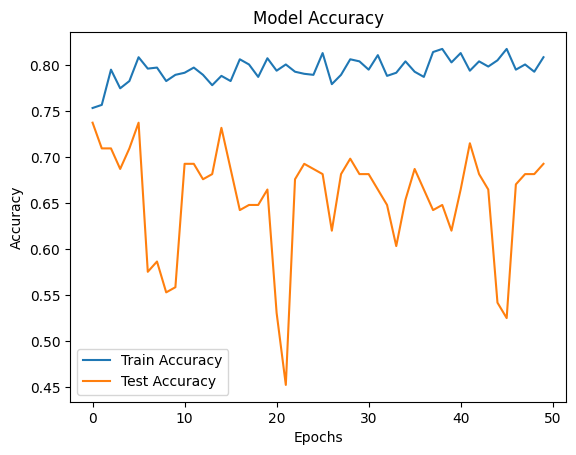

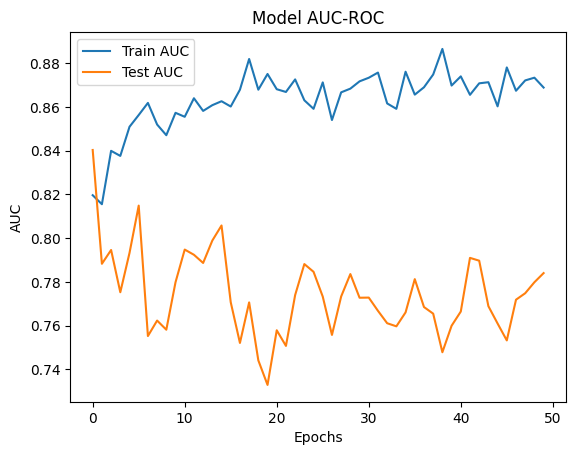

In [45]:
# (13) Use another metrics and track it while training - I'll use AUC
# AUC-ROC (Area Under the Receiver Operating Characteristic Curve) as a new evaluation metric. 
# This metric will give you a better understanding of how well your model distinguishes between the two classes (survived or not survived).
from keras.metrics import AUC
import matplotlib.pyplot as plt

# Modify your model to use AUC as a metric
improved_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC()])

# Train the model
history = improved_model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plotting accuracy and AUC

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot AUC
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Test AUC')
plt.title('Model AUC-ROC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

# TODO - I think I should run everything with much less epochs or with early start!!! Added!


Training with original data...
Epoch 1/50


/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - loss: 0.6600 - val_accuracy: 0.8194 - val_loss: 0.6076
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.7303 - loss: 0.6191 - val_accuracy: 0.8889 - val_loss: 0.5357
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.8042 - loss: 0.5508 - val_accuracy: 0.8889 - val_loss: 0.4574
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.8141 - loss: 0.5004 - val_accuracy: 0.8889 - val_loss: 0.4002
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.7836 - loss: 0.4936 - val_accuracy: 0.8889 - val_loss: 0.3612
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.7851 - loss: 0.4780 - val_accuracy: 0.9028 - val_loss: 0.3410
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8081 - loss: 0.4449 - val_accuracy: 0.9028 - val_loss: 0.3221
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.7937 - loss: 0.4599 - val_accuracy: 0.9028 - val_lo

/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5587 - loss: 0.6971 - val_accuracy: 0.6404 - val_loss: 0.5618
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.6650 - loss: 0.6135 - val_accuracy: 0.6180 - val_loss: 0.5737
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.7426 - loss: 0.5495 - val_accuracy: 0.5506 - val_loss: 0.5628
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.7364 - loss: 0.5311 - val_accuracy: 0.5506 - val_loss: 0.5585
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.7476 - loss: 0.4825 - val_accuracy: 0.6517 - val_loss: 0.5456
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.7856 - loss: 0.4541 - val_accuracy: 0.7079 - val_loss: 0.5481
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.7814 - loss: 0.4527 - val_accuracy: 0.7640 - val_loss: 0.5368
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.8061 - loss: 0.4352 - val_accuracy: 0.7416 - val_lo

/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4070 - loss: 0.8058 - val_accuracy: 0.0926 - val_loss: 0.9824
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4315 - loss: 0.7594 - val_accuracy: 0.0000e+00 - val_loss: 0.8987
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5277 - loss: 0.7182 - val_accuracy: 0.0000e+00 - val_loss: 0.8604
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5378 - loss: 0.6852 - val_accuracy: 0.0000e+00 - val_loss: 0.8573
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.6006 - loss: 0.6421 - val_accuracy: 0.1852 - val_loss: 0.8419
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.6197 - loss: 0.6396 - val_accuracy: 0.2037 - val_loss: 0.8465
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.6594 - loss: 0.6058 - val_accuracy: 0.2963 - val_loss: 0.8402
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.6659 - loss: 0.6241 - val_accuracy: 0.3519 - 

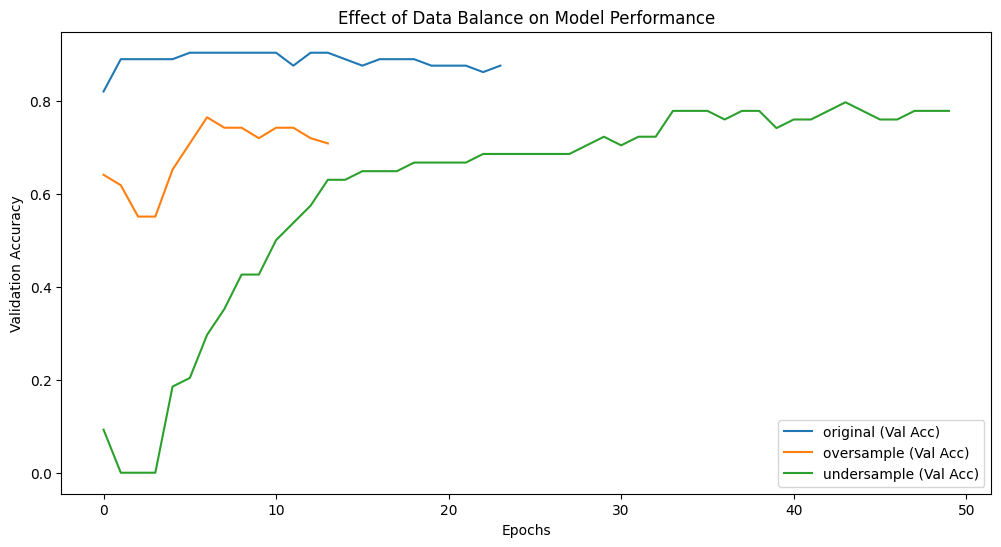

In [49]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# Define function to balance training data
def balance_data(X, y, method):
    if method == "original":
        return X, y  # No changes
    elif method == "oversample":
        sampler = RandomOverSampler(random_state=42)
    elif method == "undersample":
        sampler = RandomUnderSampler(random_state=42)
    else:
        raise ValueError("Invalid method")

    X_changed, y_changed = sampler.fit_resample(X, y)
    return X_changed, y_changed

# Define the model (same for all cases)
def create_model():
    model = Sequential([
        Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(8, activation="relu"),
        Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Train and evaluate models with different class balances
balance_methods = ["original", "oversample", "undersample"]
results = {}

for method in balance_methods:
    print(f"\nTraining with {method} data...")
    X_train_balanced, y_train_balanced = balance_data(X_train_scaled, y_train, method)
    
    model = create_model()
    history = model.fit(X_train_balanced, y_train_balanced, validation_split=0.1,
                        epochs=50, batch_size=16,
                           callbacks=[early_stopping])

    # Predict on the test set
    y_pred = (improved_model.predict(X_test_scaled) > 0.5).astype("int32") # Test in trest and not X_test_scaled

    # Evaluate the model
    print("Neural Network Performance:")
    print(classification_report(y_test, y_pred))

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    results[method] = {"history": history, "accuracy": test_acc}

    print(f"Test Accuracy ({method}): {test_acc:.4f}")

# Plot comparison of validation accuracy
plt.figure(figsize=(12, 6))
for method in balance_methods:
    plt.plot(results[method]["history"].history["val_accuracy"], label=f"{method} (Val Acc)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Effect of Data Balance on Model Performance")
plt.show()


Training with 2 PCA components...
PCA with 2 components explains 48.21% of variance.


/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Performance with 2 PCA components:
              precision    recall  f1-score   support

           0       0.75      0.90      0.81       105
           1       0.79      0.57      0.66        74

    accuracy                           0.76       179
   macro avg       0.77      0.73      0.74       179
weighted avg       0.77      0.76      0.75       179

Test Accuracy (2 PCs): 0.7598

Training with 5 PCA components...
PCA with 5 components explains 83.16% of variance.


/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Performance with 5 PCA components:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

Test Accuracy (5 PCs): 0.8156

Training with 10 PCA components...
PCA with 10 components explains 100.00% of variance.


/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Performance with 10 PCA components:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

Test Accuracy (10 PCs): 0.8045

Training with 10 PCA components...
PCA with 10 components explains 100.00% of variance.


/Users/ifat.peleg/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Performance with 10 PCA components:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Test Accuracy (10 PCs): 0.8324


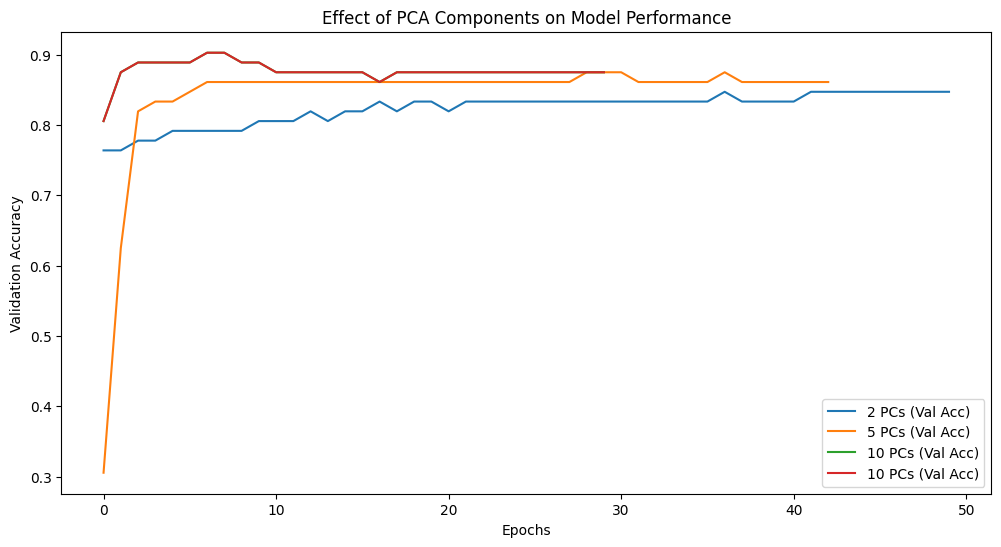

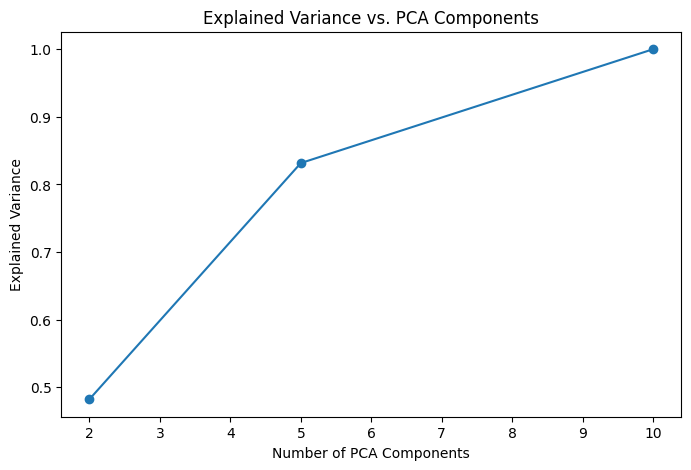

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Function to apply PCA
def apply_pca(X_train, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"PCA with {n_components} components explains {explained_variance:.2%} of variance.")
    
    return X_train_pca, X_test_pca, explained_variance

# Define the model (same for all cases)
def create_model(input_dim):
    model = Sequential([
        Dense(16, activation="relu", input_shape=(input_dim,)),
        Dense(8, activation="relu"),
        Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Define the PCA values to test
pca_values = [2, 5, 10, X_train_scaled.shape[1]]  # Test different numbers of components
results = {}

for n_components in pca_values:
    print(f"\nTraining with {n_components} PCA components...")
    
    # Apply PCA
    X_train_pca, X_test_pca, variance_explained = apply_pca(X_train_scaled, X_test_scaled, n_components)

    # Train the model
    model = create_model(input_dim=n_components)
    history = model.fit(X_train_pca, y_train, validation_split=0.1,
                        epochs=50, batch_size=16, callbacks=[early_stopping], verbose=0)

    # Predict on the test set
    y_pred = (model.predict(X_test_pca) > 0.5).astype("int32")

    # Evaluate the model
    print(f"Performance with {n_components} PCA components:")
    print(classification_report(y_test, y_pred))

    test_loss, test_acc = model.evaluate(X_test_pca, y_test, verbose=0)
    results[n_components] = {
        "history": history,
        "accuracy": test_acc,
        "variance_explained": variance_explained
    }

    print(f"Test Accuracy ({n_components} PCs): {test_acc:.4f}")

# Plot comparison of validation accuracy
plt.figure(figsize=(12, 6))
for n_components in pca_values:
    plt.plot(results[n_components]["history"].history["val_accuracy"], label=f"{n_components} PCs (Val Acc)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Effect of PCA Components on Model Performance")
plt.show()

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(pca_values[:-1], [results[n]["variance_explained"] for n in pca_values[:-1]], marker='o', linestyle='-')
plt.xlabel("Number of PCA Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance vs. PCA Components")
plt.show()


In [ ]:
# Manipultae the dataset for better results - TODO - try removing the outliers, 
# if doesn't improve too much - write about it - might have removed other significant values 
# Like younger kids affect the family size...
# Look for outliers in age:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for a specific column (e.g., "age")
sns.boxplot(x=df['age'])
plt.show()


In [ ]:
import pandas as pd

# Calculate Q1 (25th percentile), Q3 (75th percentile) and IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 2 * IQR
# upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Print outliers
print(outliers)

# 66 rows! Out of 891 - We should make sure we're not removing other significant values...
# I'll try running without them and see how the model behaves

In [ ]:
# Remove outliers by filtering the dataset 
Requires reevaluating the train and test - should be done earlier so we can compare....
    First define the train and test and only then split to x and y....
# df_cleaned = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X, y, test_size=0.2, random_state=42)

# print(f"Training with age outliers removed")

# model = Sequential([
#     Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(neurons, activation='relu'),  # Second hidden layer
#     Dense(1, activation='sigmoid')  # Output layer
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# y_pred = (model.predict(X_test) > 0.5).astype("int32")

# print(f"Performance for {neurons} neurons:\n")
# print(classification_report(y_test, y_pred))
# print("-" * 50, "\n")